In [14]:
from utils import make_nice_plots
from mock_event_maker import MockEvent
from mock_catalog_maker import MockCatalog
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import json

make_nice_plots()


### Setup all dictionaries for population priors and hyperparameters

The hyperparameter dictionaries are in .json format and should contain all possible hyperparameters as keys. The values only matter for the population params used in the simulation. The models for the AGN and ALT hypotheses are chosen from the options in `priors.py`.

In [15]:
with open("hyperparam_agn.json", "r") as file:
    hyperparam_dict_agn = json.load(file)
with open("hyperparam_alt.json", "r") as file:
    hyperparam_dict_alt = json.load(file)

model_dict = {
            'agn': ['PrimaryMass-gaussian'], 
            'alt': ['PrimaryMass-gaussian']
        }

### Set global parameters needed for generating mock GWs

In [16]:
# For catalog
N_AGN = 1000000         # Number of AGN in catalog
MAX_REDSHIFT = 5.       # Redshift up to which AGNs are generated
GEN_GWS_UP_TO_Z = 1.5   # Redshift up to which GWs are generated
COMPLETENESS = 1.       # Detection fraction of AGNs in the catalog

# For GWs
N_EVENTS = 10000        # Number of GWs in dataset
F_AGN = 0.5             # Fraction of GWs coming from AGN
CL = 0.9                # Localization volume confidence level


### Make AGN catalog and generate GWs

In [17]:
Catalog = MockCatalog(
                    n_agn=N_AGN,
                    max_redshift=MAX_REDSHIFT,
                    gw_box_radius=GEN_GWS_UP_TO_Z,
                    completeness=COMPLETENESS
                )


No redshift bins specified, therefore assuming a uniform catalog.
Distributing 177966 sources in the bin r = [0, np.float64(4477.008681208667)].
Distributing 822034 sources in the bin r = [np.float64(4477.008681208667), np.float64(7959.306115843636)].
Spherical coordinates added to catalog
Cartesian coordinates added to catalog
Redshifts and errors added to catalog
Measured redshifts added to catalog
Detected AGN added to catalog


In [ ]:
GWEvents = MockEvent(
                    model_dict=model_dict,
                    n_events=N_EVENTS,
                    f_agn=F_AGN,
                    use_skymaps=True,
                    hyperparam_dict_agn=hyperparam_dict_agn,
                    hyperparam_dict_alt=hyperparam_dict_alt,
                    catalog=Catalog, 
                    skymap_cl=CL
                )

_ = GWEvents.get_posteriors()

#################### FAGN = 0 EVENTS WITH SKYMAPS ####################
# GWEvents = MockEvent.with_skymaps_without_agn(
#                                             n_events=N_EVENTS,
#                                             zmax=GEN_GWS_UP_TO_Z,  # We do not pass a catalog, but the max redshift must still be specified
#                                             skymap_cl=CL
#                                         )
######################################################################

#################### GW EVENTS WITHOUT SKYMAPS ####################
# events = MockEvent.without_skymaps(
#                                 n_events=N_EVENTS,
#                                 f_agn=F_AGN,
#                                 zmax=GEN_GWS_UP_TO_Z,  # We do not pass a catalog, but the max redshift must still be specified
#                                 model_dict=model_dict,
#                                 hyperparam_dict_agn=hyperparam_dict_agn,
#                                 hyperparam_dict_alt=hyperparam_dict_alt,
#                             )
###################################################################### 


Generating true GW sky positions...
Confirming: 10000 Skymaps have been generated with CL = 0.9

Got the population priors on ['mass_1_source'], modelled as `['PrimaryMass-gaussian']` for AGN and `['PrimaryMass-gaussian']` for ALT.

Generating true GW intrinsic parameter values...
Done.

Generating sky localization...
Done.

Generating intrinsic parameter posteriors...
Done.


### All true values are stored in MockEvents.properties


In [19]:
GWEvents.properties.head()

,x,y,z,r,theta,phi,redshift,from_agn,sigma,loc_vol,loc_rad,mass_1_source,x_meas_center,y_meas_center,z_meas_center,r_meas_center,theta_meas_center,phi_meas_center,redshift_meas_center
0,-970.984030,-3280.506478,-1747.172711,3841.502989,2.042961,-1.858567,1.190260,True,101.112495,6.768117e+07,252.809318,8.444585,-993.273594,-3325.562688,-1508.140656,3781.768227,1.981041,-1.861724,1.163694
1,-397.156531,-1139.123101,-3985.577770,4164.152364,2.847675,-1.906269,1.340991,True,145.799926,2.029202e+08,364.540306,6.829958,-423.186771,-1264.736906,-3912.831264,4138.572189,2.810050,-1.895091,1.328573
2,1207.546893,-928.714491,1623.239622,2226.114772,0.753673,-0.655608,0.586602,True,16.399399,2.887601e+05,41.003052,9.350830,1236.791910,-949.891501,1640.108122,2263.852771,0.760174,-0.654560,0.598481
3,24.105878,1138.676140,2506.910297,2753.500260,0.426438,1.549629,0.760873,True,32.918121,2.335385e+06,82.304444,10.351830,-39.090577,1089.620562,2551.046823,2774.789971,0.403909,1.606723,0.768308
4,-903.670774,-2147.682709,768.396021,2453.486159,1.252251,-1.969075,0.659497,True,22.450758,7.408775e+05,56.133130,7.202139,-886.843200,-2128.827767,762.655377,2429.776397,1.251253,-1.965689,0.651744


In [20]:
# These are handy masks
agn_events = (GWEvents.properties['from_agn'] == True)
alt_events = ~agn_events  # or (GWEvents.properties['from_agn'] == False)

### Let's look at these posteriors

MockEvents.posteriors is a pandas DataFrame where the columns contain the event parameters and the rows contain the GW events. Each element in the DataFrame is a list of posterior samples. The default is 1000 samples.

In [21]:
GWEvents.posteriors.head()

,x,y,z,r,theta,phi,redshift,mass_1_source
0,"[-983.8593605688466, -950.8967575166724, -867....","[-3284.4486431850187, -3335.588945103701, -323...","[-1389.7634436912294, -1435.7339600228215, -14...","[3699.5978917335538, 3753.890016784796, 3668.6...","[1.955897138181387, 1.963259686778089, 1.99087...","[-1.8618409999060195, -1.8485058849979628, -1....","[1.127792383823315, 1.1514313294804226, 1.1144...","[6.3510730863016285, 2.9459094573712084, 6.120..."
1,"[-624.6485979269992, -401.5960652295783, -628....","[-1278.7110534976096, -1145.5526491755447, -12...","[-3851.773372986882, -3917.9353025948885, -375...","[4106.269102978989, 4101.681034278542, 4019.19...","[2.7876763978917114, 2.841139027965134, 2.7803...","[-2.025200577409646, -1.9079785968014293, -2.0...","[1.3130100556498627, 1.3108103612588697, 1.271...","[6.328930303884521, 0.8152787680040499, 10.123..."
2,"[1222.8931280985846, 1278.6303409865372, 1258....","[-961.5777354710776, -936.6457484480521, -945....","[1629.895028215128, 1641.69234806161, 1670.602...","[2253.1438363106827, 2281.9628771435355, 2295....","[0.7621009390674308, 0.7678277621874735, 0.755...","[-0.666339803460914, -0.6322316640500596, -0.6...","[0.5951013170152057, 0.6042116723769932, 0.608...","[7.346468299643754, 5.909291076425305, 7.98932..."
3,"[-98.55508147177437, -50.40702312272698, -71.2...","[1073.3861278533159, 1148.2884085360347, 1113....","[2571.9215093782955, 2537.6440624487745, 2504....","[2788.664758258793, 2785.811286652388, 2742.10...","[0.3968656243956363, 0.4252940959040032, 0.419...","[1.6623565955911153, 1.6146656910925927, 1.634...","[0.773171688947399, 0.7721703039144983, 0.7569...","[9.482903776751444, 8.082305518715598, 7.56506..."
4,"[-890.545680767263, -848.470077367026, -885.33...","[-2142.152597284831, -2145.423502025664, -2108...","[738.6274079375947, 743.7967423065556, 755.738...","[2434.637510461051, 2424.0414742939356, 2408.2...","[1.2625554344527008, 1.2589235686780242, 1.251...","[-1.964784529765289, -1.9473992794211317, -1.9...","[0.6533304471081017, 0.649873976924292, 0.6447...","[7.762150321153207, 8.194419311384344, 7.99551..."


In [22]:
primary_mass_posteriors = np.vstack(GWEvents.posteriors['mass_1_source'])  # Make 2D array of shape (n_gws, n_samples)


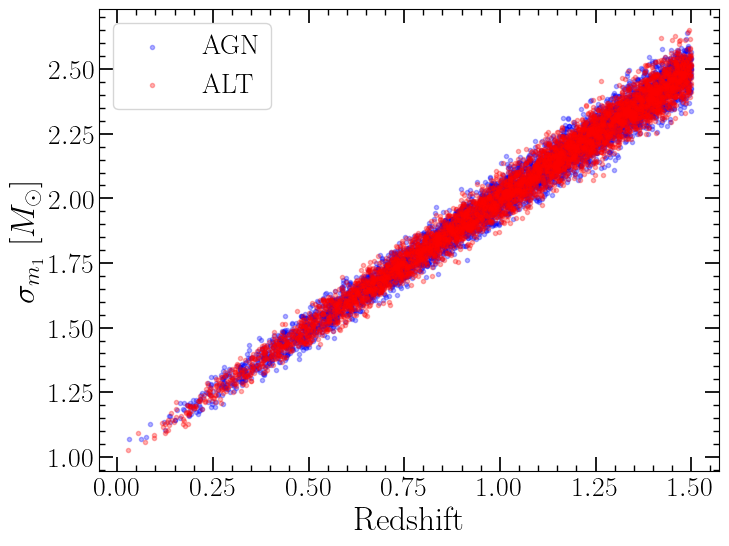

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(GWEvents.properties['redshift'][agn_events], np.std(primary_mass_posteriors[agn_events, :], axis=1), marker='.', color='blue', alpha=0.3, label='AGN')
ax.scatter(GWEvents.properties['redshift'][alt_events], np.std(primary_mass_posteriors[alt_events, :], axis=1), marker='.', color='red', alpha=0.3, label='ALT')
ax.set_xlabel('Redshift')
ax.set_ylabel(r'$\sigma_{m_{1}}$' + r' $\left[M_{\odot}\right]$')
ax.legend()
plt.show()


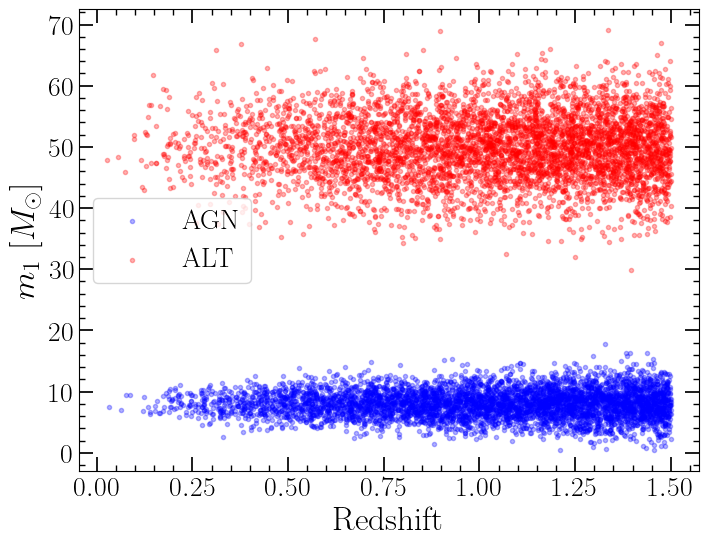

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(GWEvents.properties['redshift'][agn_events], np.median(primary_mass_posteriors[agn_events, :], axis=1), marker='.', color='blue', alpha=0.3, label='AGN')
ax.scatter(GWEvents.properties['redshift'][alt_events], np.median(primary_mass_posteriors[alt_events, :], axis=1), marker='.', color='red', alpha=0.3, label='ALT')
ax.set_xlabel('Redshift')
ax.set_ylabel(r'$m_{1}$' + r' $\left[M_{\odot}\right]$')
ax.legend()
plt.show()


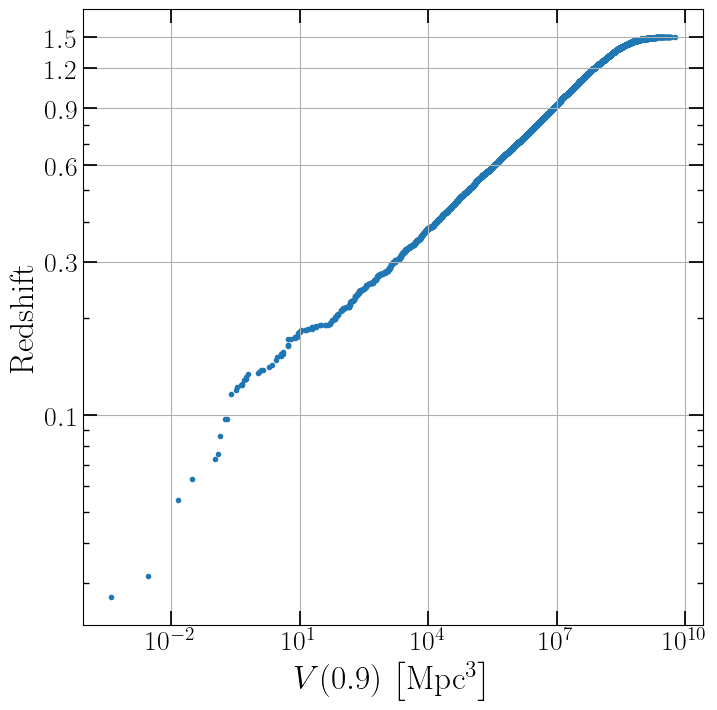

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(GWEvents.properties['loc_vol'], GWEvents.properties['redshift'], marker='.')
ax.set_ylabel('Redshift')
ax.set_xlabel(f'$V({GWEvents.skymap_cl})$' + r' $\left[\mathrm{Mpc^{3}}\right]$')
ax.loglog()
ax.set_yticks([0.1, 0.3, 0.6, 0.9, 1.2, 1.5])
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.grid()
plt.show()


### If only $f_{\rm agn}$ is inferred, we can precompute the probabilities of the AGN and ALT hypotheses

The hierarchical likelihood is given by
\begin{equation}
    p(D|\Lambda) = \prod_{i}^{N_{\rm gw}} \frac{1}{\alpha(\Lambda)} \int \mathrm{d} \theta \, p(d_i | \theta) p_{\rm pop}(\theta | \Lambda) \, .
\end{equation}

Just focussing on the primary mass of a single GW and ignoring selection effects,
\begin{equation}
    p(d|\Lambda) = \int \mathrm{d} m_{1} \, p(d | m_{1}) p_{\rm pop}(m_{1} | \Lambda) \, ,
\end{equation}
and converting the event likelihood to the event posterior,
\begin{equation}
    p(d|\Lambda) = \int \mathrm{d} m_{1} \, \frac{p(d)}{\pi_{\rm PE}(m_{1})} p(m_{1} | d) p_{\rm pop}(m_{1} | \Lambda) \, .
\end{equation}

We assume $p_{\rm pop}(m_{1} | \Lambda)$ to be known exactly (but we have to do inference at a later stage)! The posteriors $p(m_{1} | d)$ are measured/simulated, the evidence $p(d)$ is irrelevant and the parameter estimation prior $\pi_{\rm PE}(m_{1})$ is [UNIFORM?]


We sample a subset of GWs from the total pool to do our analysis. This is in general recommended in order to save computation time.

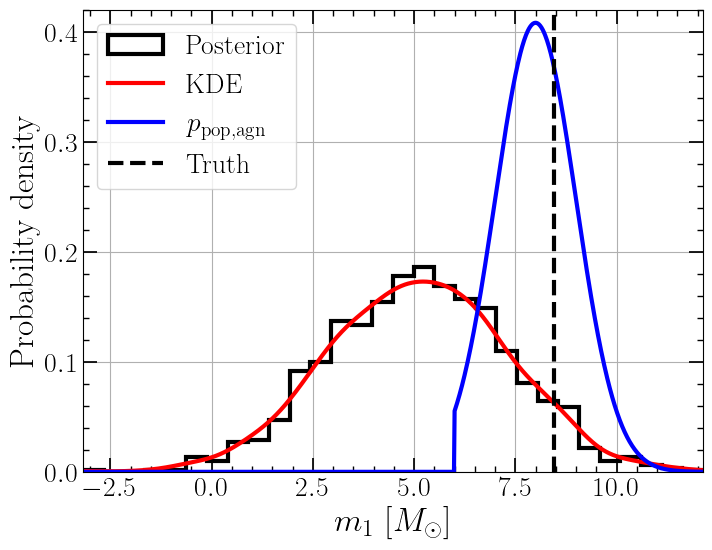

In [41]:
# Example for a single GW

from scipy.stats import gaussian_kde as kde
from scipy.integrate import quad

intrinsic_param_posterior = np.array(GWEvents.posteriors['mass_1_source'].iloc[0])
intrinsic_param_kde = kde(intrinsic_param_posterior)

xmin, xmax = np.min(intrinsic_param_posterior), np.max(intrinsic_param_posterior)
ymin, ymax = 0, 0.42
xx = np.linspace(xmin, xmax, 1000)
plt.figure(figsize=(8,6))
plt.hist(intrinsic_param_posterior, density=True, bins=30, histtype='step', linewidth=3, color='black', label='Posterior')
plt.plot(xx, intrinsic_param_kde(xx), color='red', linewidth=3, label='KDE')
for Model in GWEvents.agn_models:
    population_prior_agn = Model.joint_prob(xx)
    plt.plot(xx, population_prior_agn, color='blue', linewidth=3, label=r'$p_{\rm pop, agn}$')
plt.vlines(GWEvents.properties['mass_1_source'].iloc[0], ymin, ymax, linestyle='dashed', linewidth=3, color='black', label='Truth')
plt.xlabel(r'$m_{1}$' + r' $\left[M_{\odot}\right]$')
plt.ylabel('Probability density')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend()
plt.grid()
plt.show()


In [42]:
xmax_new = 50
xx_larger = np.linspace(xmin, xmax_new, 1000)

population_prior_times_posterior_agn = lambda x: GWEvents.agn_models[0].joint_prob(np.atleast_1d(x)) * intrinsic_param_kde(x)
population_prior_times_posterior_alt = lambda x: GWEvents.alt_models[0].joint_prob(np.atleast_1d(x)) * intrinsic_param_kde(x)

total_prob_agn = quad(population_prior_times_posterior_agn, xmin, xmax_new)
total_prob_alt = quad(population_prior_times_posterior_alt, xmin, xmax_new)
print(total_prob_agn, total_prob_alt)


(0.08053498057828844, 1.4029441183958626e-08) (1.2322286391380863e-16, 1.913924810572783e-16)
